# Preprocess Data and split it into a training and test set

Here, I will preprocess all of the data, only for the subset of features I will be using. And I will also make sure to split it into a test and training set, so that it is ready for applying KMeans and DBScan clustering methods.

It should primarily be based on just the movie descriptions, but if I have additional time, I could consider also including other features such as movie title and genre.

In [1]:
# Import all necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('movies_with_genres.csv')
df

,Name,ID,Year,Length,Age,Rating,Description,Genre,Directors,stars
0,The Shawshank Redemption,tt0111161,1994,2h 22m,15,9.3 (3M),A banker convicted of uxoricide forms a friend...,"['Epic', 'Prison Drama', 'Drama']",['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']"
1,The Godfather,tt0068646,1972,2h 55m,15,9.2 (2.1M),The aging patriarch of an organized crime dyna...,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan']"
2,Pulp Fiction,tt0110912,1994,2h 34m,18,8.9 (2.3M),"The lives of two mob hitmen, a boxer, a gangst...","['Dark Comedy', 'Drug Crime', 'Gangster', 'Cri...",['Quentin Tarantino'],"['John Travolta', 'Uma Thurman', 'Samuel L. Ja..."
3,The Godfather Part II,tt0071562,1974,3h 22m,X,9.0 (1.4M),The early life and career of Vito Corleone in ...,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",['Francis Ford Coppola'],"['Al Pacino', 'Robert De Niro', 'Robert Duvall']"
4,Inception,tt1375666,2010,2h 28m,12A,8.8 (2.6M),A thief who steals corporate secrets through t...,"['Action Epic', 'Adventure Epic', 'Psychologic...",['Christopher Nolan'],"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ..."
...,...,...,...,...,...,...,...,...,...,...
1676,Closer,tt0376541,2004,1h 44m,15,7.2 (240K),The relationships of two couples become compli...,"['Steamy Romance', 'Drama', 'Romance']",['Mike Nichols'],"['Natalie Portman', 'Jude Law', 'Clive Owen']"
1677,Together,tt0203166,2000,1h 46m,15,7.4 (25K),"In 1975, the dynamics of a Swedish commune beg...","['Comedy', 'Drama', 'Romance']",['Lukas Moodysson'],"['Lisa Lindgren', 'Michael Nyqvist', 'Emma Sam..."
1678,Mamma Mia!,tt0795421,2008,1h 48m,PG,6.5 (284K),"Donna, an independent hotelier, is preparing f...","['Feel-Good Romance', 'Jukebox Musical', 'Pop ...",['Phyllida Lloyd'],"['Meryl Streep', 'Pierce Brosnan', 'Amanda Sey..."
1679,Switchblade Romance,tt0338095,2003,1h 31m,18,6.7 (80K),Best friends Marie and Alexia decide to spend ...,"['Psychological Horror', 'Slasher Horror', 'Ho...",['Alexandre Aja'],"['Cécile de France', 'Maïwenn', 'Philippe Nahon']"


In [181]:
train, test = train_test_split(df)

## Perform TF.IDF on the movie genres

In [59]:
df_genres = df['Genre']
tfidf_vector_genres = TfidfVectorizer(stop_words='english', token_pattern=r'\b\w[\w-]+\b', min_df=0.06, max_df=0.6)
tfidf_result_genres = tfidf_vector_genres.fit_transform(df_genres)
tfidf_df_genres = pd.DataFrame(tfidf_result_genres.toarray(), columns=tfidf_vector_genres.get_feature_names_out())
tfidf_df_genres

,action,adventure,biography,comedy,crime,dark,drama,epic,family,fantasy,horror,mystery,psychological,romance,sci-fi,supernatural,thriller,tragedy
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.693971,0.720002,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.434893,0.000000,0.275456,0.571577,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.638977
2,0.000000,0.000000,0.0,0.315363,0.778734,0.483009,0.246620,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.434893,0.000000,0.275456,0.571577,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.638977
4,0.316379,0.340899,0.0,0.000000,0.000000,0.000000,0.000000,0.694095,0.0,0.0,0.000000,0.0,0.234015,0.000000,0.40774,0.0,0.284445,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.275360,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.961341,0.00000,0.0,0.000000,0.000000
1677,0.000000,0.000000,0.0,0.536437,0.000000,0.000000,0.419504,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.732292,0.00000,0.0,0.000000,0.000000
1678,0.000000,0.000000,0.0,0.590951,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.806708,0.00000,0.0,0.000000,0.000000
1679,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.940327,0.0,0.340273,0.000000,0.00000,0.0,0.000000,0.000000


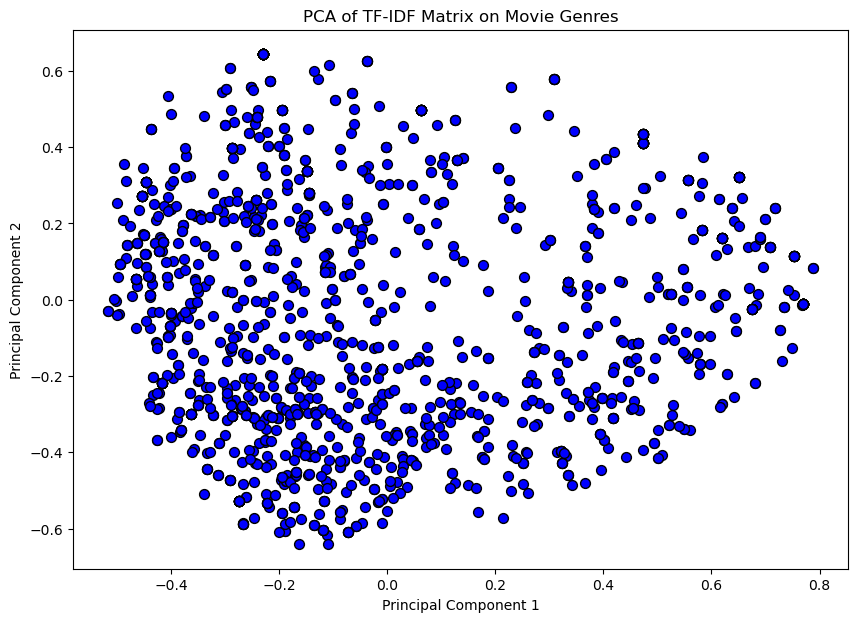

In [60]:
# First visualize the scores using PCA:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_result_genres.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)

plt.title('PCA of TF-IDF Matrix on Movie Genres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


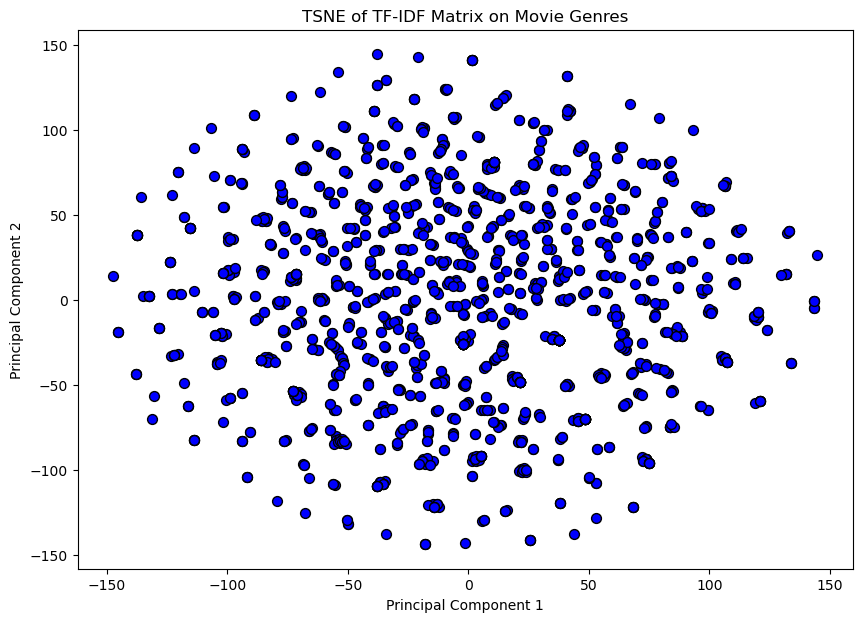

In [7]:
# Then test if a non-linear approach is better:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=2, random_state=0)
tsne_result = tsne.fit_transform(tfidf_result_genres.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='blue', edgecolor='k', s=50)

plt.title('TSNE of TF-IDF Matrix on Movie Genres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply TF-IDF on the plot summaries:

In [39]:
df_descr = df['Description']
tfidf_vector_descr = TfidfVectorizer(stop_words='english', min_df=0.03, max_df=0.75)
tfidf_result_descr = tfidf_vector_descr.fit_transform(df_descr)
tfidf_df_descr = pd.DataFrame(tfidf_result_descr.toarray(), columns=tfidf_vector_descr.get_feature_names_out())
tfidf_df_descr

,agent,american,city,death,family,father,finds,friends,group,help,...,story,team,time,town,war,wife,woman,world,year,young
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.549902,0.0,0.516613,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.747585,0.0,0.0,0.0
1677,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
1678,0.0,0.0,0.000000,0.0,0.000000,0.495787,0.0,0.511736,0.0,0.504384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1679,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


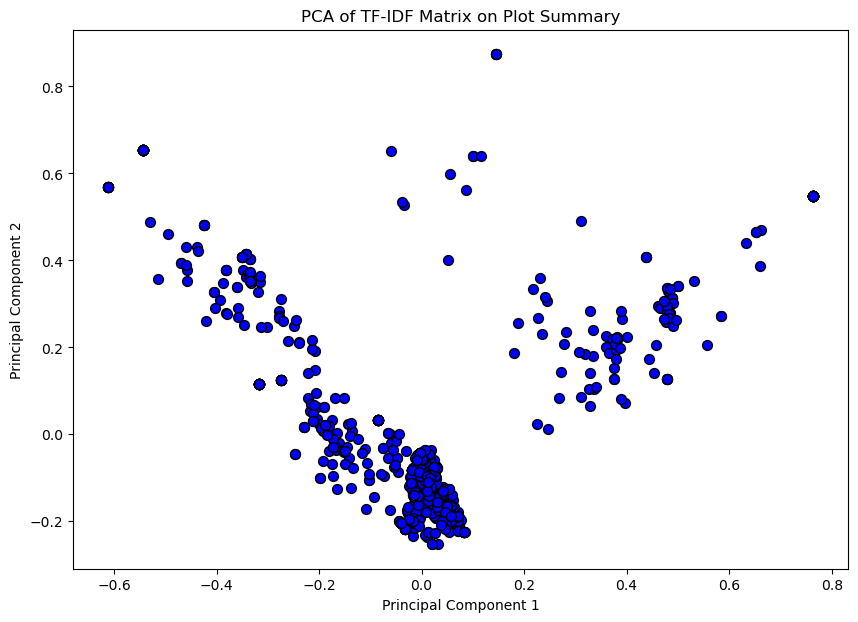

In [61]:
# First visualize the scores using PCA (linear approach):
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_result_descr.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)

plt.title('PCA of TF-IDF Matrix on Plot Summary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply TF-IDF on both plot summaries and movie genres:

In [72]:
df_title = df['Name']
tfidf_vector_title = TfidfVectorizer(stop_words='english', min_df=0.005)
tfidf_result_title = tfidf_vector_title.fit_transform(df_title)
tfidf_df_title = pd.DataFrame(tfidf_result_title.toarray(), columns=tfidf_vector_title.get_feature_names_out())
tfidf_df_title

,american,black,city,dark,day,dead,good,harry,ii,iii,...,life,man,men,movie,night,saw,story,street,wars,world
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
from scipy.sparse import hstack, vstack

total_vecs = hstack((tfidf_result_descr, tfidf_result_genres, tfidf_result_title))
total_vecs

<1681x67 sparse matrix of type '<class 'numpy.float64'>'
	with 7924 stored elements in Compressed Sparse Row format>

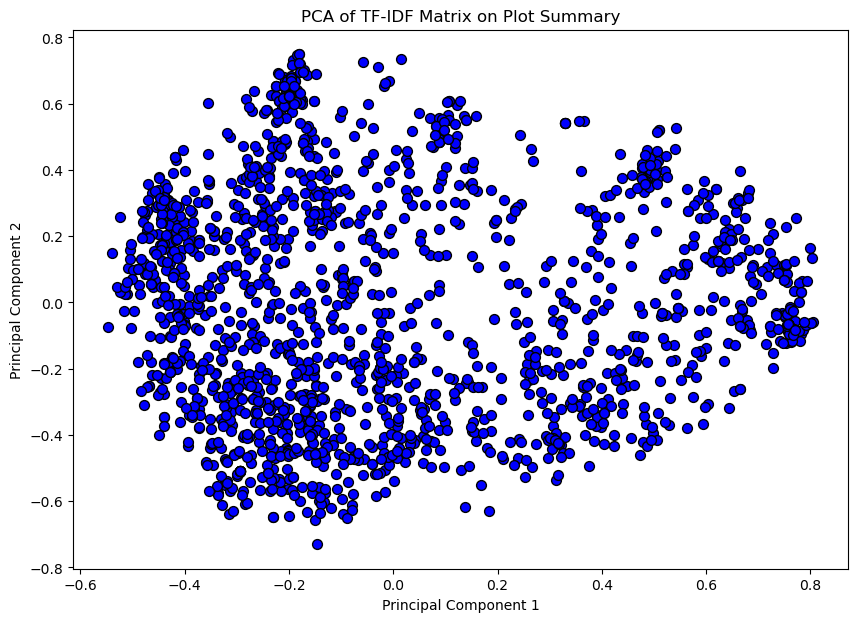

In [74]:
# First visualize the scores using PCA (linear approach):
pca = PCA(n_components=2)
pca_result = pca.fit_transform(total_vecs.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)

plt.title('PCA of TF-IDF Matrix on Plot Summary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Preparing for K-Means Clustering:

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

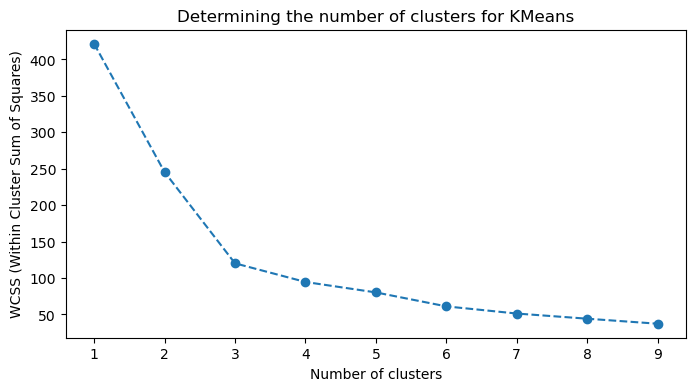

In [76]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_clusters = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_result)
    num_clusters.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), num_clusters, linestyle = '--', marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Determining the number of clusters for KMeans')
plt.show()

From the results of the WCSS test, I will try out the K-Means clustering algorithm with both 3 and 4 clusters to compare, and plot the results in a scatterplot.

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


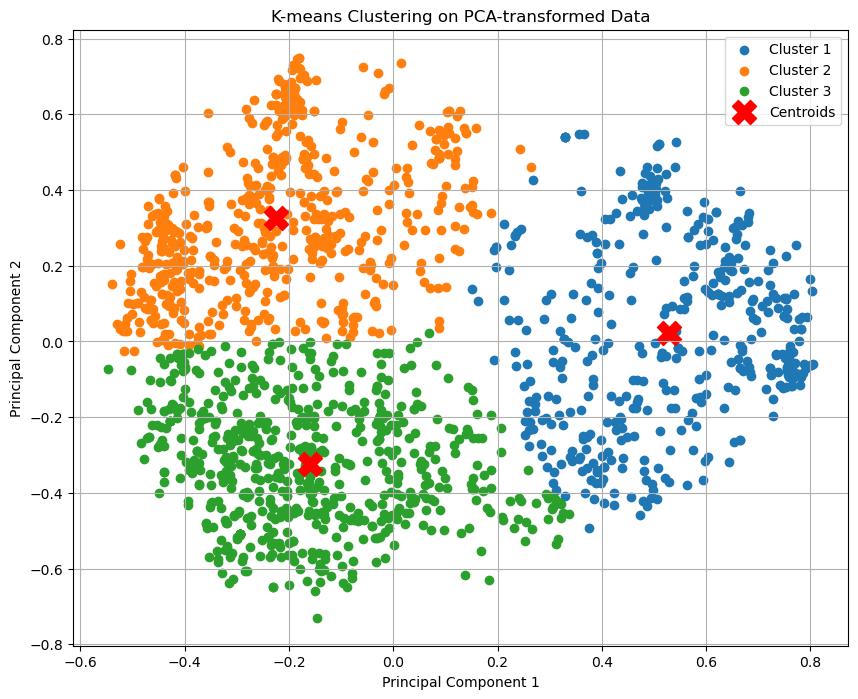

In [87]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_result)

kmeans3_labels = kmeans.labels_
kmeans3_labels_reshaped = kmeans3_labels.reshape(-1, 1)
clustered_points_3 = pca_result
kmeans3_result = np.hstack((clustered_points_3, kmeans3_labels_reshaped))


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Scatterplot of PCA results with clusters
plt.figure(figsize=(10, 8))
for cluster in range(3):
    plt.scatter(
        pca_result[clusters == cluster, 0], 
        pca_result[clusters == cluster, 1], 
        label=f"Cluster {cluster + 1}"
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-transformed Data')
plt.legend()
plt.grid()
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


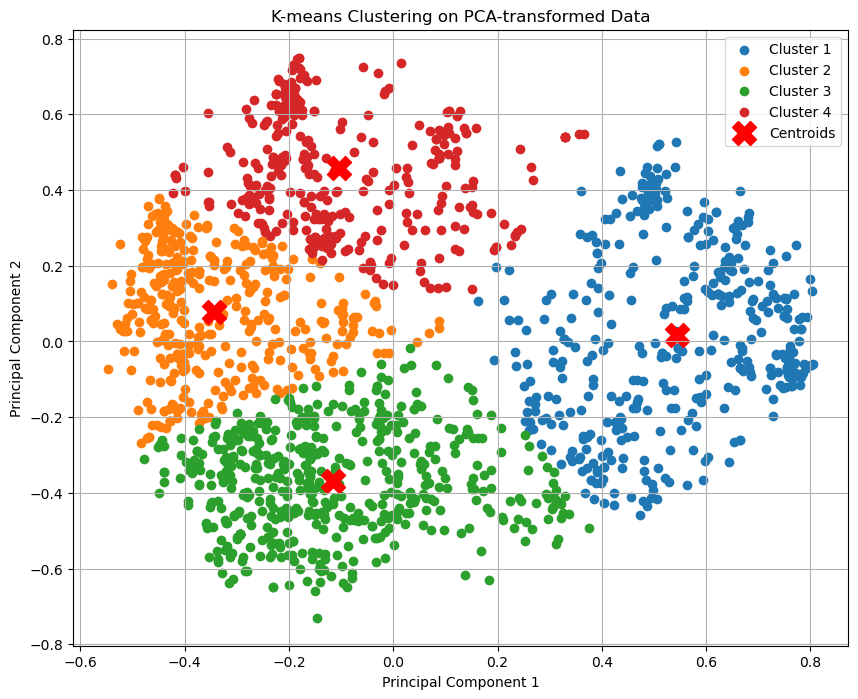

In [88]:
# Apply K-means clustering to the PCA results
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Scatterplot of PCA results with clusters
plt.figure(figsize=(10, 8))
for cluster in range(4):
    plt.scatter(
        pca_result[clusters == cluster, 0], 
        pca_result[clusters == cluster, 1], 
        label=f"Cluster {cluster + 1}"
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-transformed Data')
plt.legend()
plt.grid()
plt.show()

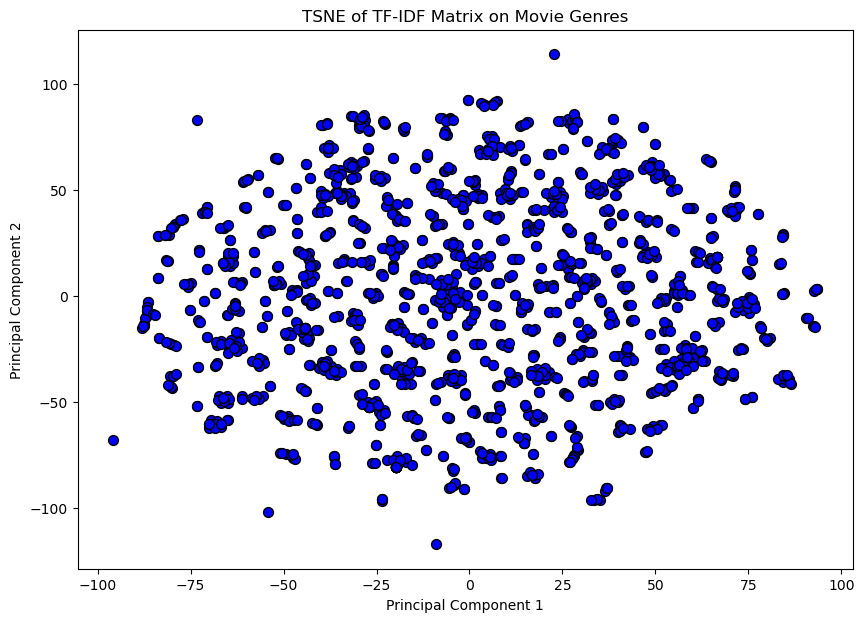

In [21]:
# Then test if a non-linear approach is better:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=2, random_state=0)
tsne_result = tsne.fit_transform(total_vecs.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='blue', edgecolor='k', s=50)

plt.title('TSNE of TF-IDF Matrix on Movie Genres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [183]:
df_titles = train['Name']
merged = pd.merge(df_titles, tfidf_df_genres, left_index=True, right_index=True)
merged.drop([i for i in merged.columns if 'remove' in i], axis=1, inplace=True)
merged

,Name,action,adventure,biography,comedy,crime,dark,drama,epic,family,...,fi,horror,mystery,psychological,romance,sci,slapstick,supernatural,thriller,tragedy
263,The Ring,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.794056,0.376029,0.000000,0.000000,0.000000,0.0,0.477575,0.000000,0.0
71,Heat,0.396377,0.000000,0.0,0.0,0.441099,0.000000,0.558773,0.579733,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1424,9,0.261487,0.281752,0.0,0.0,0.000000,0.360972,0.184309,0.000000,0.0,...,0.336997,0.000000,0.000000,0.000000,0.000000,0.336997,0.0,0.000000,0.000000,0.0
788,12 Angry Men,0.000000,0.000000,0.0,0.0,0.395973,0.000000,0.752413,0.000000,0.0,...,0.000000,0.000000,0.000000,0.526384,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1253,The Accused,0.000000,0.000000,0.0,0.0,0.619611,0.000000,0.784909,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,Das Experiment,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.377106,0.000000,0.0,...,0.000000,0.000000,0.000000,0.791465,0.000000,0.000000,0.0,0.000000,0.481013,0.0
890,Blood Diamond,0.000000,0.487209,0.0,0.0,0.000000,0.000000,0.318709,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.813051,0.0
1545,The Girl with the Dragon Tattoo,0.000000,0.000000,0.0,0.0,0.542411,0.000000,0.343556,0.000000,0.0,...,0.000000,0.000000,0.629066,0.000000,0.000000,0.000000,0.0,0.000000,0.438219,0.0
262,A Knight's Tale,0.348864,0.375902,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.858482,0.000000,0.0,0.000000,0.000000,0.0


# Try out DBSCAN on the vectorized categorical data:

In [184]:
dbscan_model = DBSCAN(eps=1.0, min_samples=3)
train_df_genre = merged.drop(['Name'], axis=1)
dbscan_model.fit(train_df_genre)

clusters = dbscan_model.labels_
no_clusters = len(np.unique(clusters))
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 1
Estimated no. of noise points: 0


In [129]:
train['Clusters'] = clusters.tolist()
c0 = train[train['Clusters'] == 0]
c0_genre = pd.merge(df_genres, c0, left_index=True, right_index=True)
c0_genre

,Genre_x,Name,ID,Year,Length,Age,Rating,Description,Genre_y,Directors,stars,Clusters
1,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",The Godfather,tt0068646,1972,2h 55m,15,9.2 (2.1M),The aging patriarch of an organized crime dyna...,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan']",0
3,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",The Godfather Part II,tt0071562,1974,3h 22m,X,9.0 (1.4M),The early life and career of Vito Corleone in ...,"['Epic', 'Gangster', 'Tragedy', 'Crime', 'Drama']",['Francis Ford Coppola'],"['Al Pacino', 'Robert De Niro', 'Robert Duvall']",0
51,"['Period Drama', 'Prison Drama', 'Supernatural...",The Green Mile,tt0120689,1999,3h 9m,18,8.6 (1.4M),"Paul Edgecomb, the head guard of a prison, mee...","['Period Drama', 'Prison Drama', 'Supernatural...",['Frank Darabont'],"['Tom Hanks', 'Michael Clarke Duncan', 'David ...",0
78,"['Coming-of-Age', 'Docudrama', 'Road Trip', 'S...",Into the Wild,tt0758758,2007,2h 28m,15,8.1 (669K),"After graduating from Emory University, top st...","['Coming-of-Age', 'Docudrama', 'Road Trip', 'S...",['Sean Penn'],"['Emile Hirsch', 'Vince Vaughn', 'Catherine Ke...",0
84,"['Drug Crime', 'Epic', 'Gangster', 'Tragedy', ...",Scarface,tt0086250,1983,2h 50m,18,8.3 (941K),Miami in the 1980s: a determined criminal-mind...,"['Drug Crime', 'Epic', 'Gangster', 'Tragedy', ...",['Brian De Palma'],"['Al Pacino', 'Michelle Pfeiffer', 'Steven Bau...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
1497,"['Dark Comedy', 'Period Drama', 'Showbiz Drama...",Inside Llewyn Davis,tt2042568,2013,1h 44m,15,7.4 (166K),A week in the life of a young singer as he nav...,"['Dark Comedy', 'Period Drama', 'Showbiz Drama...","['Ethan Coen', 'Joel Coen']","['Oscar Isaac', 'Carey Mulligan', 'John Goodman']",0
1537,"['Tragedy', 'Adventure', 'Drama', 'Western']",The Treasure of the Sierra Madre,tt0040897,1948,2h 6m,PG,8.2 (135K),Two down-on-their-luck Americans searching for...,"['Tragedy', 'Adventure', 'Drama', 'Western']",['John Huston'],"['Humphrey Bogart', 'Walter Huston', 'Tim Holt']",0
1567,"['Docudrama', 'Mountain Adventure', 'Period Dr...",Alive,tt0106246,1993,2h 8m,15,7.1 (66K),"After crash-landing in the snowswept Andes, a ...","['Docudrama', 'Mountain Adventure', 'Period Dr...",['Frank Marshall'],"['Ethan Hawke', 'Vincent Spano', 'Josh Hamilton']",0
1614,"['Quest', 'Road Trip', 'Tragedy', 'Adventure',...",Easy Rider,tt0064276,1969,1h 35m,15,7.2 (119K),Two bikers head from L.A. to New Orleans throu...,"['Quest', 'Road Trip', 'Tragedy', 'Adventure',...",['Dennis Hopper'],"['Peter Fonda', 'Dennis Hopper', 'Jack Nichols...",0


In [105]:
train['Clusters'] = clusters.tolist()
c1 = train[train['Clusters'] == 1]
c1_genre = pd.merge(df_genres, c1, left_index=True, right_index=True)
c1_genre

,Genre_x,Name,ID,Year,Length,Age,Rating,Description,Genre_y,Directors,stars,Clusters
209,"['Cop Drama', 'Drug Crime', 'Gangster', 'Polic...",Training Day,tt0139654,2001,2h 2m,18,7.8 (485K),A rookie cop spends his first day as a Los Ang...,"['Cop Drama', 'Drug Crime', 'Gangster', 'Polic...",['Antoine Fuqua'],"['Denzel Washington', 'Ethan Hawke', 'Scott Gl...",1
227,"['Tragedy', 'Action', 'Crime', 'Drama', 'Thril...",Man on Fire,tt0328107,2004,2h 26m,18,7.7 (398K),"In Mexico City, a former CIA operative swears ...","['Tragedy', 'Action', 'Crime', 'Drama', 'Thril...",['Tony Scott'],"['Denzel Washington', 'Christopher Walken', 'D...",1
938,"['Tragedy', 'Crime', 'Drama', 'Thriller']",21 Grams,tt0315733,2003,2h 4m,15,7.6 (248K),A freak accident brings together a critically ...,"['Tragedy', 'Crime', 'Drama', 'Thriller']",['Alejandro G. Iñárritu'],"['Sean Penn', 'Benicio Del Toro', 'Naomi Watts']",1
1163,"['Period Drama', 'Road Trip', 'Tragedy', 'Crim...",A Perfect World,tt0107808,1993,2h 18m,15,7.5 (89K),A kidnapped boy strikes up a friendship with h...,"['Period Drama', 'Road Trip', 'Tragedy', 'Crim...",['Clint Eastwood'],"['Kevin Costner', 'Clint Eastwood', 'Laura Dern']",1
1209,"['Gangster', 'Period Drama', 'Tragedy', 'Crime...",Miller's Crossing,tt0100150,1990,1h 55m,18,7.7 (144K),"Tom Reagan, an advisor to a Prohibition-era cr...","['Gangster', 'Period Drama', 'Tragedy', 'Crime...","['Joel Coen', 'Ethan Coen']","['Gabriel Byrne', 'Albert Finney', 'John Turtu...",1
1600,"['Tragedy', 'Crime', 'Drama']",In the Bedroom,tt0247425,2001,2h 11m,15,7.4 (43K),A New England couple's college-aged son dates ...,"['Tragedy', 'Crime', 'Drama']",['Todd Field'],"['Tom Wilkinson', 'Sissy Spacek', 'Nick Stahl']",1


In [107]:
train['Clusters'] = clusters.tolist()
c2 = train[train['Clusters'] == 2]
c2_genre = pd.merge(df_genres, c2, left_index=True, right_index=True)
c2_genre

,Genre_x,Name,ID,Year,Length,Age,Rating,Description,Genre_y,Directors,stars,Clusters
54,"['Docudrama', 'Political Drama', 'Biography', ...",Downfall,tt0363163,2004,2h 36m,15,8.2 (382K),"Traudl Junge, the final secretary for Adolf Hi...","['Docudrama', 'Political Drama', 'Biography', ...",['Oliver Hirschbiegel'],"['Bruno Ganz', 'Alexandra Maria Lara', 'Ulrich...",2
70,"['Docudrama', 'Biography', 'Drama', 'History',...",Hotel Rwanda,tt0395169,2004,2h 1m,12A,8.1 (378K),"Paul Rusesabagina, a hotel manager, houses ove...","['Docudrama', 'Biography', 'Drama', 'History',...",['Terry George'],"['Don Cheadle', 'Sophie Okonedo', 'Joaquin Pho...",2
229,"['Docudrama', 'Football', 'Biography', 'Comedy...",Remember the Titans,tt0210945,2000,1h 53m,PG,7.8 (237K),"In 1971, Virginia high-school football was eve...","['Docudrama', 'Football', 'Biography', 'Comedy...",['Boaz Yakin'],"['Denzel Washington', 'Will Patton', 'Wood Har...",2
423,"['Basketball', 'Biography', 'Drama', 'Sport']",Coach Carter,tt0393162,2005,2h 16m,12A,7.3 (176K),Controversy surrounds high school basketball c...,"['Basketball', 'Biography', 'Drama', 'Sport']",['Thomas Carter'],"['Samuel L. Jackson', 'Rick Gonzalez', ""Robert...",2
656,"['Basketball', 'Biography', 'Drama', 'Sport']",Glory Road,tt0385726,2006,1h 58m,PG,7.2 (49K),"In 1966, Texas Western coach Don Haskins led t...","['Basketball', 'Biography', 'Drama', 'Sport']",['James Gartner'],"['Josh Lucas', 'Derek Luke', 'Austin Nichols']",2
763,"['Docudrama', 'Biography', 'Drama']",The Aviator,tt0338751,2004,2h 50m,12A,7.5 (390K),A biopic depicting the early years of legendar...,"['Docudrama', 'Biography', 'Drama']",['Martin Scorsese'],"['Leonardo DiCaprio', 'Cate Blanchett', 'Kate ...",2
797,"['Boxing', 'Docudrama', 'Biography', 'Drama', ...",Raging Bull,tt0081398,1980,2h 9m,X,8.1 (388K),"The life of boxer Jake LaMotta, whose violence...","['Boxing', 'Docudrama', 'Biography', 'Drama', ...",['Martin Scorsese'],"['Robert De Niro', 'Cathy Moriarty', 'Joe Pesci']",2
823,"['Period Drama', 'Political Drama', 'Biography...",The King's Speech,tt1504320,2010,1h 58m,15,8.0 (715K),"The story of King George VI, his unexpected as...","['Period Drama', 'Political Drama', 'Biography...",['Tom Hooper'],"['Colin Firth', 'Geoffrey Rush', 'Helena Bonha...",2
830,"['Boxing', 'Docudrama', 'Period Drama', 'Biogr...",Cinderella Man,tt0352248,2005,2h 24m,12A,8.0 (201K),"The true story of James J. Braddock, a suppose...","['Boxing', 'Docudrama', 'Period Drama', 'Biogr...",['Ron Howard'],"['Russell Crowe', 'Renée Zellweger', 'Craig Bi...",2
869,"['Docudrama', 'Biography', 'Drama', 'Sport']",Ali,tt0248667,2001,2h 37m,15,6.7 (107K),"A biography of sports legend Muhammad Ali, foc...","['Docudrama', 'Biography', 'Drama', 'Sport']",['Michael Mann'],"['Will Smith', 'Jamie Foxx', 'Jon Voight']",2


In [108]:
train['Clusters'] = clusters.tolist()
c3 = train[train['Clusters'] == 3]
c3_genre = pd.merge(df_genres, c3, left_index=True, right_index=True)
c3_genre

,Genre_x,Name,ID,Year,Length,Age,Rating,Description,Genre_y,Directors,stars,Clusters
268,"['Dark Comedy', 'Martial Arts', 'Action', 'Thr...",The Tournament,tt0471041,2009,1h 35m,18,6.0 (36K),A tournament is watched by dozens of wealthy m...,"['Dark Comedy', 'Martial Arts', 'Action', 'Thr...",['Scott Mann'],"['Ving Rhames', 'Robert Carlyle', 'Kelly Hu']",3
297,"['Dark Comedy', 'One-Person Army Action', 'Act...",Crank,tt0479884,2006,1h 28m,18,6.9 (268K),Professional assassin Chev Chelios learns his ...,"['Dark Comedy', 'One-Person Army Action', 'Act...","['Mark Neveldine', 'Brian Taylor']","['Jason Statham', 'Amy Smart', 'Carlos Sanz']",3
302,"['Dark Comedy', 'One-Person Army Action', 'Act...",Crank 2: High Voltage,tt1121931,2009,1h 36m,18,6.1 (162K),Chelios faces a Chinese mobster who has stolen...,"['Dark Comedy', 'One-Person Army Action', 'Act...","['Mark Neveldine', 'Brian Taylor']","['Jason Statham', 'Amy Smart', 'Clifton Collin...",3
499,"['Dark Comedy', 'Gun Fu', 'Martial Arts', 'Act...",Romeo Must Die,tt0165929,2000,1h 55m,15,6.1 (75K),An avenging cop seeks out his brother's killer...,"['Dark Comedy', 'Gun Fu', 'Martial Arts', 'Act...",['Andrzej Bartkowiak'],"['Jet Li', 'Aaliyah', 'Isaiah Washington']",3
560,"['Dark Comedy', 'One-Person Army Action', 'Act...",The Long Kiss Goodnight,tt0116908,1996,2h 1m,18,6.8 (87K),"Government agents come after a amnesiac woman,...","['Dark Comedy', 'One-Person Army Action', 'Act...",['Renny Harlin'],"['Geena Davis', 'Samuel L. Jackson', 'Yvonne Z...",3
609,"['Dark Comedy', 'Action', 'Crime', 'Thriller']",Shaft,tt0162650,2000,1h 39m,18,6.0 (82K),New York City police detective John Shaft (nep...,"['Dark Comedy', 'Action', 'Crime', 'Thriller']",['John Singleton'],"['Samuel L. Jackson', 'Vanessa Williams', 'Chr...",3
775,"['Car Action', 'Dark Comedy', 'Action', 'Drama...",Death Proof,tt1028528,2007,2h 7m,18,7.0 (320K),Two separate sets of voluptuous women are stal...,"['Car Action', 'Dark Comedy', 'Action', 'Drama...",['Quentin Tarantino'],"['Kurt Russell', 'Zoë Bell', 'Rosario Dawson']",3
837,"['Dark Comedy', 'Gun Fu', 'Action', 'Crime', '...",Once Upon a Time in Mexico,tt0285823,2003,1h 42m,15,6.3 (172K),"Hitman ""El Mariachi"" becomes involved in inter...","['Dark Comedy', 'Gun Fu', 'Action', 'Crime', '...",['Robert Rodriguez'],"['Antonio Banderas', 'Salma Hayek', 'Johnny De...",3
1099,"['Caper', 'Dark Comedy', 'Action', 'Crime', 'T...",Headhunters,tt1614989,2011,1h 40m,15,7.5 (108K),An accomplished headhunter risks everything to...,"['Caper', 'Dark Comedy', 'Action', 'Crime', 'T...",['Morten Tyldum'],"['Aksel Hennie', 'Synnøve Macody Lund', 'Nikol...",3
1226,"['Dark Comedy', 'Thriller']",Frenzy,tt0068611,1972,1h 56m,18,7.4 (50K),A serial murderer is strangling women with a n...,"['Dark Comedy', 'Thriller']",['Alfred Hitchcock'],"['Jon Finch', 'Barry Foster', 'Barbara Leigh-H...",3


In [109]:
train['Clusters'] = clusters.tolist()
c4 = train[train['Clusters'] == 4]
c4_genre = pd.merge(df_genres, c4, left_index=True, right_index=True)
c4_genre

,Genre_x,Name,ID,Year,Length,Age,Rating,Description,Genre_y,Directors,stars,Clusters
843,['Documentary'],Wasteland,tt1268204,2010,1h 39m,PG,7.8 (9.4K),On the outskirts of Rio de Janeiro is Jardim G...,['Documentary'],"['Lucy Walker', 'Karen Harley', 'João Jardim']",['Vik Muniz'],4
1495,"['Documentary', 'History']",The Corporation,tt0379225,2003,2h 25m,PG,8.0 (22K),Documentary that looks at the concept of the c...,"['Documentary', 'History']","['Mark Achbar', 'Jennifer Abbott']","['Mikela Jay', 'Rob Beckwermert', 'Christopher...",4
1575,['Western'],Rio Bravo,tt0053221,1959,2h 21m,PG,8.0 (70K),A small-town sheriff in the American West enli...,['Western'],['Howard Hawks'],"['John Wayne', 'Dean Martin', 'Ricky Nelson']",4
1629,"['Concert', 'Music']",Metallica Through the Never,tt2172935,2013,1h 33m,15,7.1 (18K),"Trip, a young roadie for Metallica, is sent on...","['Concert', 'Music']",['Nimród Antal'],"['Dane DeHaan', 'James Hetfield', 'Lars Ulrich']",4


In [110]:
train['Clusters'] = clusters.tolist()
c5 = train[train['Clusters'] == 5]
c5_genre = pd.merge(df_genres, c5, left_index=True, right_index=True)
c5_genre

,Genre_x,Name,ID,Year,Length,Age,Rating,Description,Genre_y,Directors,stars,Clusters
145,"['Road Trip', 'Survival', 'Tragedy', 'Drama', ...",The Road,tt0898367,2009,1h 51m,15,7.2 (259K),"In a dangerous post-apocalyptic world, an aili...","['Road Trip', 'Survival', 'Tragedy', 'Drama', ...",['John Hillcoat'],"['Viggo Mortensen', 'Charlize Theron', 'Kodi S...",5
168,"['Boxing', 'Tragedy', 'Drama', 'Sport']",Million Dollar Baby,tt0405159,2004,2h 12m,12A,8.1 (733K),"Frankie, an ill-tempered old coach, reluctantl...","['Boxing', 'Tragedy', 'Drama', 'Sport']",['Clint Eastwood'],"['Hilary Swank', 'Clint Eastwood', 'Morgan Fre...",5
808,"['Tragedy', 'Drama', 'Western']",Unforgiven,tt0105695,1992,2h 10m,15,8.2 (444K),Retired Old West gunslinger Will Munny relucta...,"['Tragedy', 'Drama', 'Western']",['Clint Eastwood'],"['Clint Eastwood', 'Gene Hackman', 'Morgan Fre...",5
1136,"['Tragedy', 'Drama']",The Sweet Hereafter,tt0120255,1997,1h 52m,15,7.4 (37K),A bus crash in a small town brings a lawyer to...,"['Tragedy', 'Drama']",['Atom Egoyan'],"['Ian Holm', 'Sarah Polley', 'Caerthan Banks']",5
1218,"['Tragedy', 'Drama', 'Thriller']",Amores perros,tt0245712,2000,2h 34m,18,8.0 (257K),"An amateur dog fighter, a supermodel, and a de...","['Tragedy', 'Drama', 'Thriller']",['Alejandro G. Iñárritu'],"['Emilio Echevarría', 'Gael García Bernal', 'G...",5
1262,"['Coming-of-Age', 'Teen Drama', 'Tragedy', 'Dr...",What's Eating Gilbert Grape,tt0108550,1993,1h 58m,12,7.7 (258K),A young man in a small Midwestern town struggl...,"['Coming-of-Age', 'Teen Drama', 'Tragedy', 'Dr...",['Lasse Hallström'],"['Johnny Depp', 'Leonardo DiCaprio', 'Juliette...",5
1276,"['Tragedy', 'Drama']",Nights of Cabiria,tt0050783,1957,1h 50m,PG,8.1 (53K),A waifish prostitute wanders the streets of Ro...,"['Tragedy', 'Drama']",['Federico Fellini'],"['Giulietta Masina', 'François Périer', 'Franc...",5
1306,"['Film Noir', 'Survival', 'Tragedy', 'Drama']",Ace in the Hole,tt0043338,1951,1h 51m,A,8.1 (40K),Frustrated former journalist Chuck Tatum now w...,"['Film Noir', 'Survival', 'Tragedy', 'Drama']",['Billy Wilder'],"['Kirk Douglas', 'Jan Sterling', 'Robert Arthur']",5
1309,"['Tragedy', 'Drama', 'War']",Black Rain,tt0097694,1989,2h 3m,PG,7.8 (4.1K),Though it has been five years since the atomic...,"['Tragedy', 'Drama', 'War']",['Shôhei Imamura'],"['Yoshiko Tanaka', 'Kazuo Kitamura', 'Etsuko I...",5
1323,"['Tragedy', 'Drama']",Bicycle Thieves,tt0040522,1948,1h 29m,U,8.3 (180K),"In post-war Italy, a working-class man's bicyc...","['Tragedy', 'Drama']",['Vittorio De Sica'],"['Lamberto Maggiorani', 'Enzo Staiola', 'Liane...",5


In [111]:
train['Clusters'] = clusters.tolist()
c6 = train[train['Clusters'] == 6]
c6_genre = pd.merge(df_genres, c6, left_index=True, right_index=True)
c6_genre

,Genre_x,Name,ID,Year,Length,Age,Rating,Description,Genre_y,Directors,stars,Clusters
46,"['Psychological Drama', 'Tragedy', 'Drama']",Requiem for a Dream,tt0180093,2000,1h 42m,18,8.3 (920K),The drug-induced utopias of four Coney Island ...,"['Psychological Drama', 'Tragedy', 'Drama']",['Darren Aronofsky'],"['Ellen Burstyn', 'Jared Leto', 'Jennifer Conn...",6
97,"['Psychological Drama', 'Tragedy', 'Drama', 'S...",The Wrestler,tt1125849,2008,1h 49m,15,7.9 (323K),"A faded professional wrestler must retire, but...","['Psychological Drama', 'Tragedy', 'Drama', 'S...",['Darren Aronofsky'],"['Mickey Rourke', 'Marisa Tomei', 'Evan Rachel...",6
815,"['Psychological Drama', 'Tragedy', 'Drama']",American Beauty,tt0169547,1999,2h 2m,18,8.3 (1.2M),A sexually frustrated suburban father has a mi...,"['Psychological Drama', 'Tragedy', 'Drama']",['Sam Mendes'],"['Kevin Spacey', 'Annette Bening', 'Thora Birch']",6
1093,"['Epic', 'Period Drama', 'Psychological Drama'...",There Will Be Blood,tt0469494,2007,2h 38m,12A,8.2 (655K),"A story of family, religion, hatred, oil and m...","['Epic', 'Period Drama', 'Psychological Drama'...",['Paul Thomas Anderson'],"['Daniel Day-Lewis', 'Paul Dano', 'Ciarán Hinds']",6
1229,"['Film Noir', 'Psychological Drama', 'Showbiz ...",Sunset Blvd.,tt0043014,1950,1h 50m,PG,8.4 (243K),A screenwriter develops a dangerous relationsh...,"['Film Noir', 'Psychological Drama', 'Showbiz ...",['Billy Wilder'],"['William Holden', 'Gloria Swanson', 'Erich vo...",6
1596,"['Period Drama', 'Psychological Drama', 'Trage...",Dancer in the Dark,tt0168629,2000,2h 20m,15,7.9 (119K),An Eastern European US immigrant with a love f...,"['Period Drama', 'Psychological Drama', 'Trage...",['Lars von Trier'],"['Björk', 'Catherine Deneuve', 'David Morse']",6
1622,"['Psychological Drama', 'Tragedy', 'Action', '...",Falling Down,tt0106856,1993,1h 53m,18,7.6 (212K),An ordinary man frustrated with the various fl...,"['Psychological Drama', 'Tragedy', 'Action', '...",['Joel Schumacher'],"['Michael Douglas', 'Robert Duvall', 'Barbara ...",6


In [130]:
train['Clusters'] = clusters.tolist()
c7 = train[train['Clusters'] == 7]
c7_genre = pd.merge(df_genres, c7, left_index=True, right_index=True)
c7_genre

,Genre_x,Name,ID,Year,Length,Age,Rating,Description,Genre_y,Directors,stars,Clusters
145,"['Road Trip', 'Survival', 'Tragedy', 'Drama', ...",The Road,tt0898367,2009,1h 51m,15,7.2 (259K),"In a dangerous post-apocalyptic world, an aili...","['Road Trip', 'Survival', 'Tragedy', 'Drama', ...",['John Hillcoat'],"['Viggo Mortensen', 'Charlize Theron', 'Kodi S...",7
168,"['Boxing', 'Tragedy', 'Drama', 'Sport']",Million Dollar Baby,tt0405159,2004,2h 12m,12A,8.1 (733K),"Frankie, an ill-tempered old coach, reluctantl...","['Boxing', 'Tragedy', 'Drama', 'Sport']",['Clint Eastwood'],"['Hilary Swank', 'Clint Eastwood', 'Morgan Fre...",7
808,"['Tragedy', 'Drama', 'Western']",Unforgiven,tt0105695,1992,2h 10m,15,8.2 (444K),Retired Old West gunslinger Will Munny relucta...,"['Tragedy', 'Drama', 'Western']",['Clint Eastwood'],"['Clint Eastwood', 'Gene Hackman', 'Morgan Fre...",7
1136,"['Tragedy', 'Drama']",The Sweet Hereafter,tt0120255,1997,1h 52m,15,7.4 (37K),A bus crash in a small town brings a lawyer to...,"['Tragedy', 'Drama']",['Atom Egoyan'],"['Ian Holm', 'Sarah Polley', 'Caerthan Banks']",7
1218,"['Tragedy', 'Drama', 'Thriller']",Amores perros,tt0245712,2000,2h 34m,18,8.0 (257K),"An amateur dog fighter, a supermodel, and a de...","['Tragedy', 'Drama', 'Thriller']",['Alejandro G. Iñárritu'],"['Emilio Echevarría', 'Gael García Bernal', 'G...",7
1262,"['Coming-of-Age', 'Teen Drama', 'Tragedy', 'Dr...",What's Eating Gilbert Grape,tt0108550,1993,1h 58m,12,7.7 (258K),A young man in a small Midwestern town struggl...,"['Coming-of-Age', 'Teen Drama', 'Tragedy', 'Dr...",['Lasse Hallström'],"['Johnny Depp', 'Leonardo DiCaprio', 'Juliette...",7
1276,"['Tragedy', 'Drama']",Nights of Cabiria,tt0050783,1957,1h 50m,PG,8.1 (53K),A waifish prostitute wanders the streets of Ro...,"['Tragedy', 'Drama']",['Federico Fellini'],"['Giulietta Masina', 'François Périer', 'Franc...",7
1306,"['Film Noir', 'Survival', 'Tragedy', 'Drama']",Ace in the Hole,tt0043338,1951,1h 51m,A,8.1 (40K),Frustrated former journalist Chuck Tatum now w...,"['Film Noir', 'Survival', 'Tragedy', 'Drama']",['Billy Wilder'],"['Kirk Douglas', 'Jan Sterling', 'Robert Arthur']",7
1309,"['Tragedy', 'Drama', 'War']",Black Rain,tt0097694,1989,2h 3m,PG,7.8 (4.1K),Though it has been five years since the atomic...,"['Tragedy', 'Drama', 'War']",['Shôhei Imamura'],"['Yoshiko Tanaka', 'Kazuo Kitamura', 'Etsuko I...",7
1323,"['Tragedy', 'Drama']",Bicycle Thieves,tt0040522,1948,1h 29m,U,8.3 (180K),"In post-war Italy, a working-class man's bicyc...","['Tragedy', 'Drama']",['Vittorio De Sica'],"['Lamberto Maggiorani', 'Enzo Staiola', 'Liane...",7


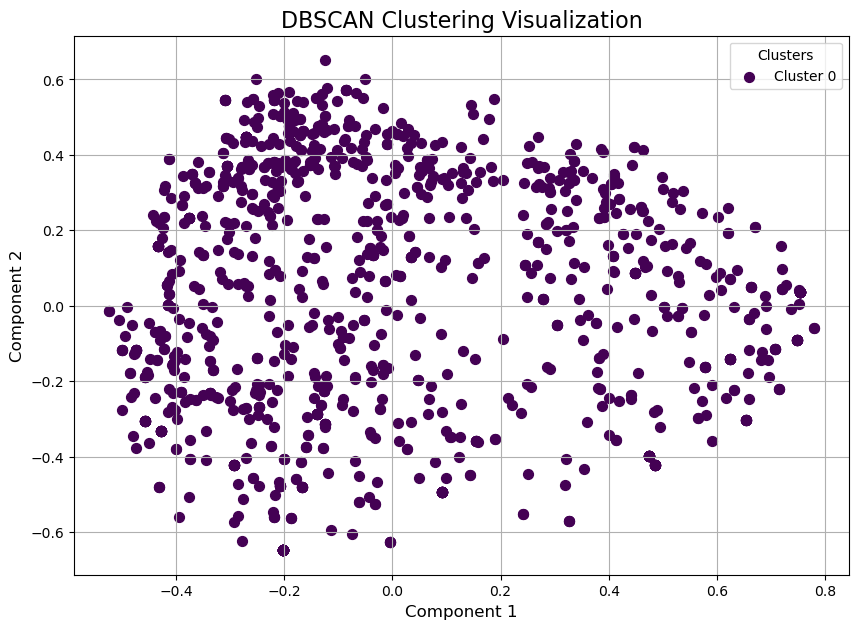

In [185]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_df_genre)

df_plot = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = dbscan_model.labels_

clusters = df_plot['Cluster'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))  # Generate distinct colors
color_map = {cluster: color for cluster, color in zip(clusters, colors)}

plt.figure(figsize=(10, 7))
for cluster in clusters:
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Component 1'],
        cluster_data['Component 2'],
        color=color_map[cluster],
        label=f"Cluster {cluster}" if cluster != -1 else "Noise",
        s=50  # Point size
    )

# Add title, labels, and legend
plt.title('DBSCAN Clustering Visualization', fontsize=16)
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 2', fontsize=12)
plt.legend(loc='upper right', title='Clusters')
plt.grid(True)
plt.show()

## Testing DBSCAN Clustering on the movie descriptions

In [202]:
df_desc = df['Description']

tfidf_vector = TfidfVectorizer(stop_words='english', min_df=0.03, max_df=0.95)
tfidf_result = tfidf_vector.fit_transform(df_desc)
tfidf_df = pd.DataFrame(tfidf_result.toarray(), columns=tfidf_vector.get_feature_names_out())


df_titles = train['Name']
merged = pd.merge(df_titles, tfidf_df, left_index=True, right_index=True)
merged.drop([i for i in merged.columns if 'remove' in i], axis=1, inplace=True)
merged

,Name,agent,american,city,death,family,father,finds,friends,group,...,story,team,time,town,war,wife,woman,world,year,young
263,The Ring,0.0,0.0,0.000000,0.717014,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
71,Heat,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1424,9,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
788,12 Angry Men,0.0,0.0,0.585671,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1253,The Accused,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.750829,0.0,0.0,0.660496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,Das Experiment,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
890,Blood Diamond,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1545,The Girl with the Dragon Tattoo,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
262,A Knight's Tale,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [215]:
dbscan_model = DBSCAN(eps=0.8, min_samples=2, metric='euclidean')
train_df = merged.drop(['Name'], axis=1)
dbscan_model.fit(train_df)

clusters = dbscan_model.labels_
no_clusters = len(np.unique(clusters))
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 10


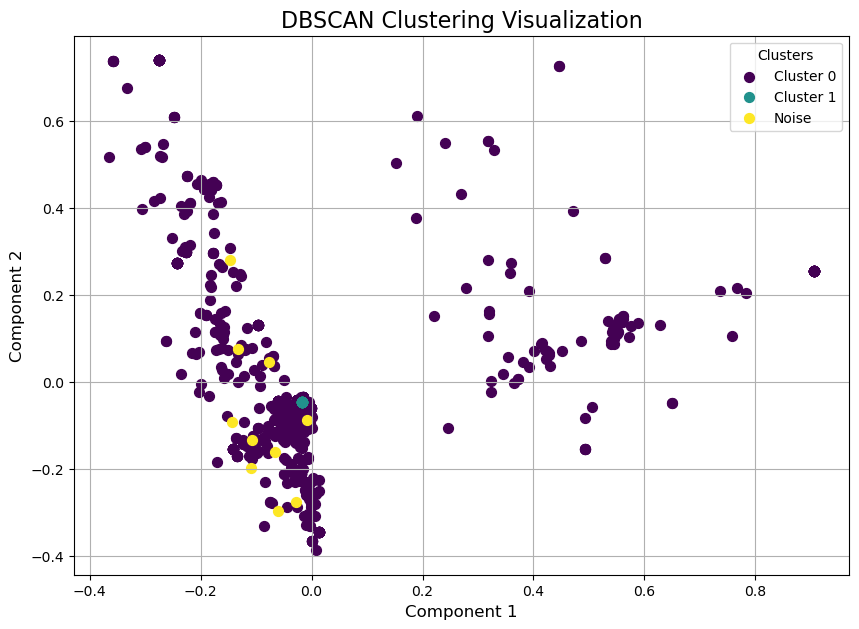

In [216]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_df)

df_plot = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = dbscan_model.labels_

clusters = df_plot['Cluster'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))  # Generate distinct colors
color_map = {cluster: color for cluster, color in zip(clusters, colors)}

plt.figure(figsize=(10, 7))
for cluster in clusters:
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Component 1'],
        cluster_data['Component 2'],
        color=color_map[cluster],
        label=f"Cluster {cluster}" if cluster != -1 else "Noise",
        s=50  # Point size
    )

# Add title, labels, and legend
plt.title('DBSCAN Clustering Visualization', fontsize=16)
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 2', fontsize=12)
plt.legend(loc='upper right', title='Clusters')
plt.grid(True)
plt.show()

## Trying out a combination of Genres and Movie Descriptions:

In [ ]:
merged_gen_desc = pd.merge(train_df, train_df_genre, left_index=True, right_index=True)
merged_gen_desc

,agent,american,city,death,family_x,father,finds,friends,group,help,...,fi,horror,mystery,psychological,romance,sci,slapstick,supernatural,thriller,tragedy
263,0.0,0.0,0.000000,0.717014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.794056,0.376029,0.000000,0.000000,0.000000,0.0,0.477575,0.000000,0.0
71,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1424,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.336997,0.000000,0.000000,0.000000,0.000000,0.336997,0.0,0.000000,0.000000,0.0
788,0.0,0.0,0.585671,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.526384,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1253,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.791465,0.000000,0.000000,0.0,0.000000,0.481013,0.0
890,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.813051,0.0
1545,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.629066,0.000000,0.000000,0.000000,0.0,0.000000,0.438219,0.0
262,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.858482,0.000000,0.0,0.000000,0.000000,0.0


c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Cluster Labels: [0 2 0 ... 2 0 2]


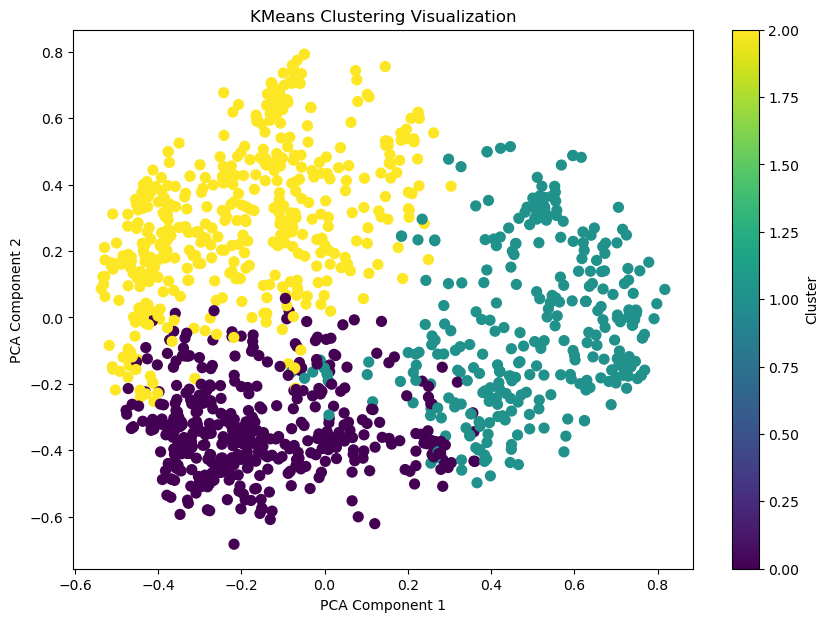

In [200]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(merged_gen_desc)

print("Cluster Labels:", labels)


# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(merged_gen_desc)

# Plot clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.title('KMeans Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

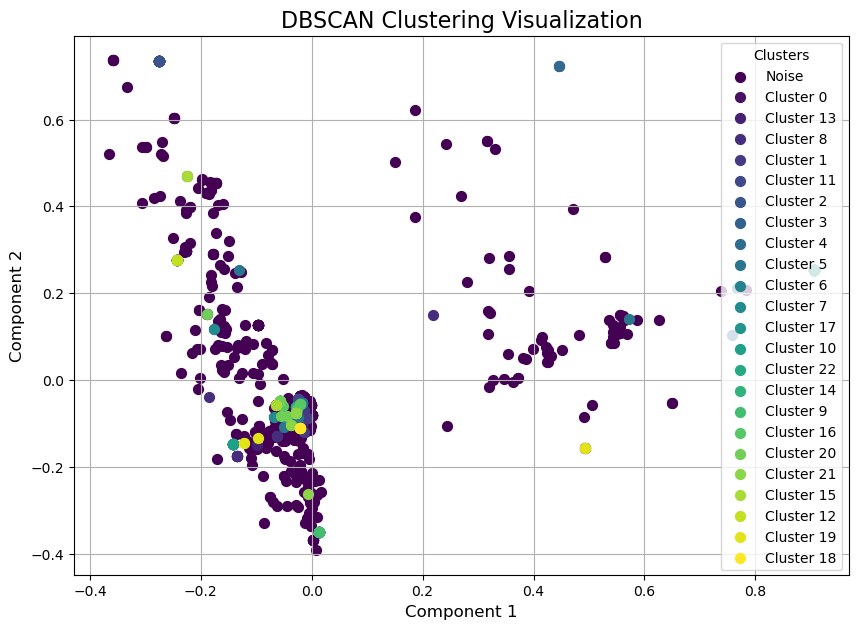

In [194]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(train_df)

df_plot = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
df_plot['Cluster'] = dbscan_model.labels_

clusters = df_plot['Cluster'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(clusters)))  # Generate distinct colors
color_map = {cluster: color for cluster, color in zip(clusters, colors)}

plt.figure(figsize=(10, 7))
for cluster in clusters:
    cluster_data = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Component 1'],
        cluster_data['Component 2'],
        color=color_map[cluster],
        label=f"Cluster {cluster}" if cluster != -1 else "Noise",
        s=50  # Point size
    )

# Add title, labels, and legend
plt.title('DBSCAN Clustering Visualization', fontsize=16)
plt.xlabel('Component 1', fontsize=12)
plt.ylabel('Component 2', fontsize=12)
plt.legend(loc='upper right', title='Clusters')
plt.grid(True)
plt.show()